# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0717 14:28:07.468704 28232 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 14:28:07.900586 28232 deprecation.py:323] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 45s 892us/step - loss: 14.4468 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 198us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - va

50000/50000 [==============================] - 9s 181us/step - loss: 14.4475 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 9s 173us/step - loss: 2.3095 - acc: 0.2158 - val_loss: 1.9712 - val_acc: 0.2900
Epoch 2/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.8792 - acc: 0.3198 - val_loss: 2.4082 - val_acc: 0.2274
Epoch 3/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.7849 - acc: 0.3604 - val_loss: 1.7905 - val_acc: 0.3560
Epoch 4/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.7073 - acc: 0.3900 - val_loss: 1.8272 - val_acc: 0.3337
Epoch 5/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6535 - acc: 0.4071 - val_loss: 1.6895 - val_acc: 0.3893
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.6058 - acc: 0.4266 - val_loss: 1.7057 - val_acc: 0.3821
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5655 - acc: 0.4425 - val_loss: 1.6074 - val_acc: 0.4268
Epoch 8/50
50000/50000 [==================

50000/50000 [==============================] - 8s 160us/step - loss: 1.7926 - acc: 0.3646 - val_loss: 1.8056 - val_acc: 0.3506
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7146 - acc: 0.3948 - val_loss: 1.7433 - val_acc: 0.3741
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6579 - acc: 0.4140 - val_loss: 1.7116 - val_acc: 0.3858
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6160 - acc: 0.4309 - val_loss: 1.6964 - val_acc: 0.3981
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5780 - acc: 0.4427 - val_loss: 1.5983 - val_acc: 0.4359
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5451 - acc: 0.4537 - val_loss: 1.5854 - val_acc: 0.4391
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5177 - acc: 0.4647 - val_loss: 1.5755 - val_acc: 0.4316
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 167us/step - loss: 1.8731 - acc: 0.3454 - val_loss: 1.8518 - val_acc: 0.3494
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8290 - acc: 0.3607 - val_loss: 1.8184 - val_acc: 0.3664
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7951 - acc: 0.3718 - val_loss: 1.7875 - val_acc: 0.3750
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7686 - acc: 0.3798 - val_loss: 1.7667 - val_acc: 0.3874
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7459 - acc: 0.3902 - val_loss: 1.7424 - val_acc: 0.3958
Epoch 8/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7260 - acc: 0.3992 - val_loss: 1.7230 - val_acc: 0.3984
Epoch 9/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7077 - acc: 0.4044 - val_loss: 1.7080 - val_acc: 0.4042
Epoch 10/50
50000/50000 [====================

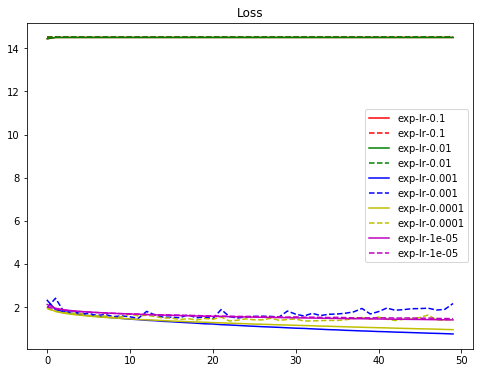

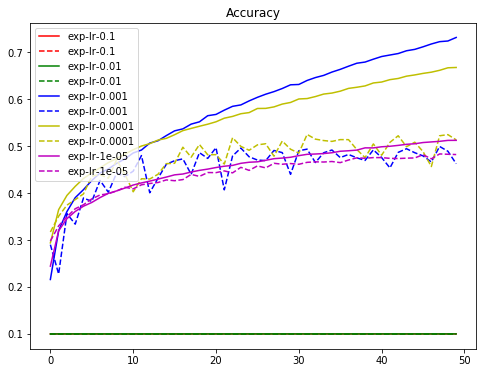

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()